In [1]:
from tqdm import tqdm

import torch
import numpy as np
import pandas as pd

C:\Users\jsfz\anaconda3\envs\pytorch17\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
all_feas = np.load("draw_wos_data/deberta_ctl_test_alllabel_lastmean.npy")

In [52]:
# dimension decomposition
from sklearn.decomposition import KernelPCA
decomposer = KernelPCA(n_components=2, kernel="linear")
feas_2d = decomposer.fit_transform(all_feas)

def l2_normailzation(data):
    norms = np.linalg.norm(data, axis=1, keepdims=True)
    return data / norms

feas_2d_normed = l2_normailzation(feas_2d)

In [53]:
feas_tan = feas_2d_normed[:, 1] / feas_2d_normed[:, 0]    

In [54]:
feas_tan.shape

(4699,)

In [55]:
angle_arctan = np.arctan(feas_tan)

C:\Users\jsfz\anaconda3\envs\pytorch17\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


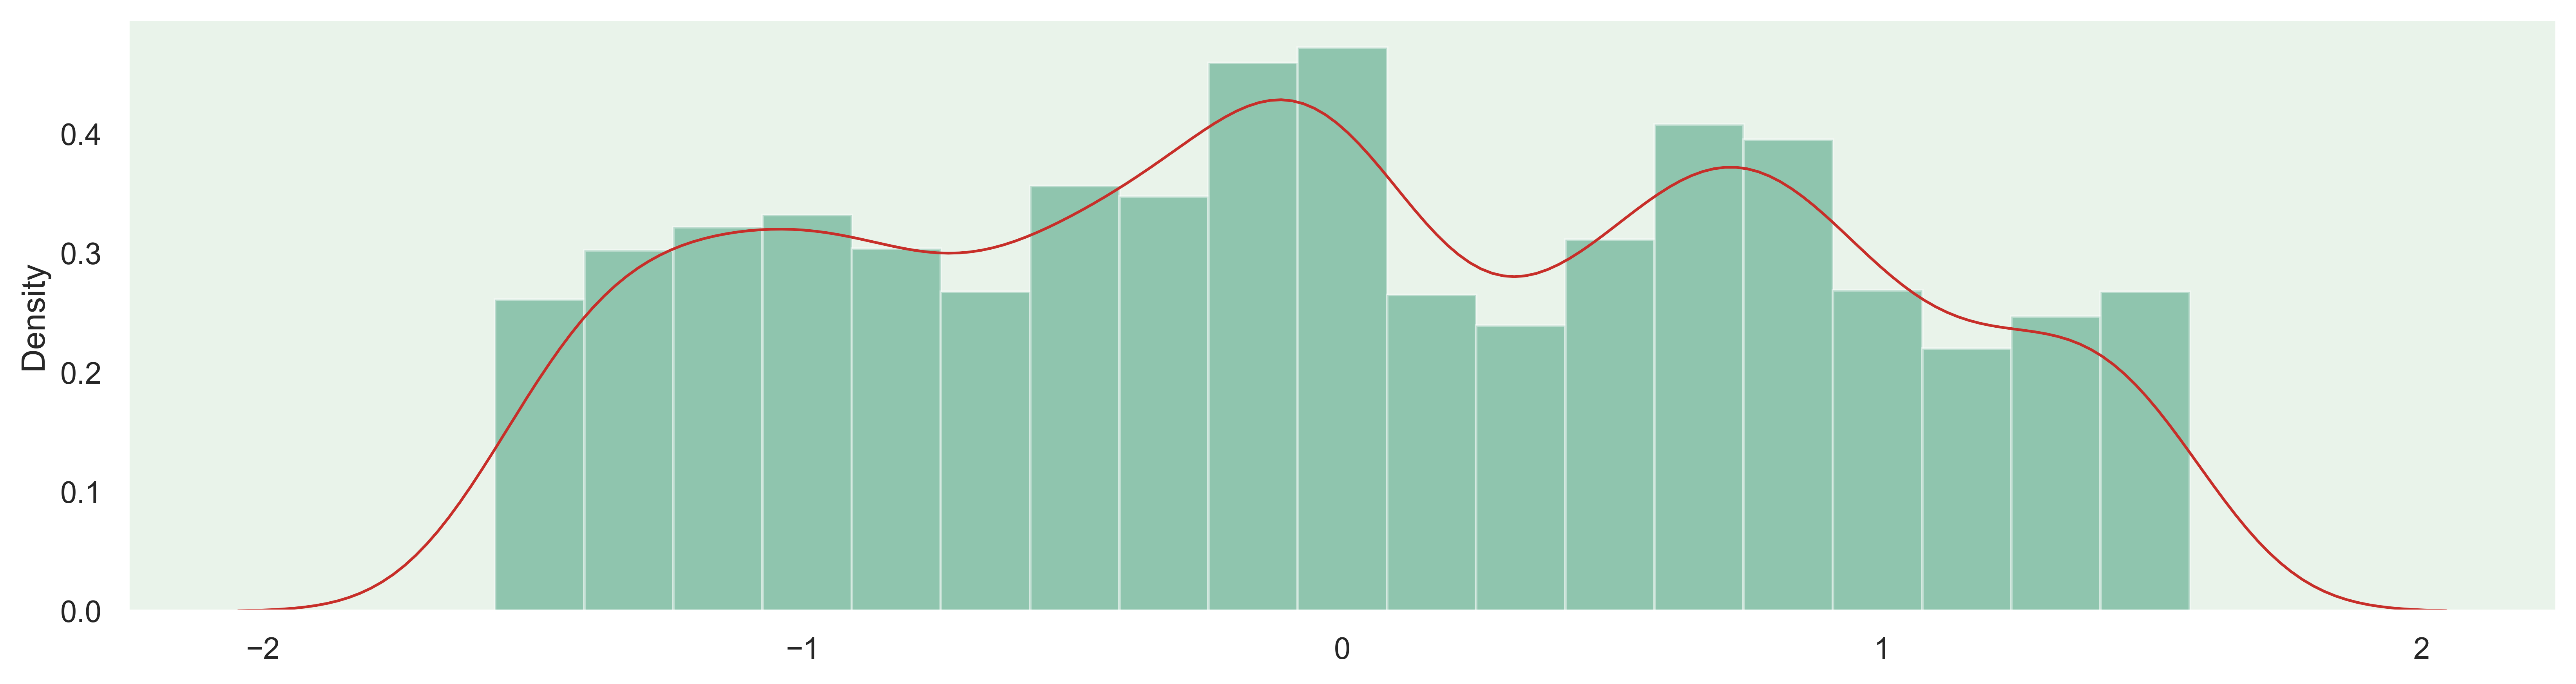

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})

fig1, ax1 = plt.subplots(figsize=(16,4), dpi=500)
ax1 = sns.distplot(
            angle_arctan,
            hist=True,
            kde=True,
            kde_kws={'linestyle':'-','linewidth':'1','color':'#c72e29'},
            color='#098154',

            
#             axlabel="Angle"
            
)

In [57]:
fig1.savefig("draw_wos_data/deberta_ctl_test_alllabel_angle.jpg", bbox_inches="tight")